In [7]:

import matplotlib.pyplot as plot
from matplotlib.image import imread
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans

# read the image
img = imread('palace.jpg')
img_size = img.shape
print(img_size)

(1365, 2048, 3)


In [2]:

# reshape it to be 2-D
X = img.reshape(img_size[0] * img_size[1], img_size[2])

In [15]:
# run k-means algorithm
km = KMeans(n_clusters=25)
km.fit(X)

KMeans(n_clusters=25)

In [16]:
# use centroids to compress the image
X_cmpresd = km.cluster_centers_[km.labels_]
X_cmpresd = np.clip(X_cmpresd.astype('uint8'), 0, 255)

In [17]:
# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_cmpresd = X_cmpresd.reshape(img_size[0], img_size[1], img_size[2])

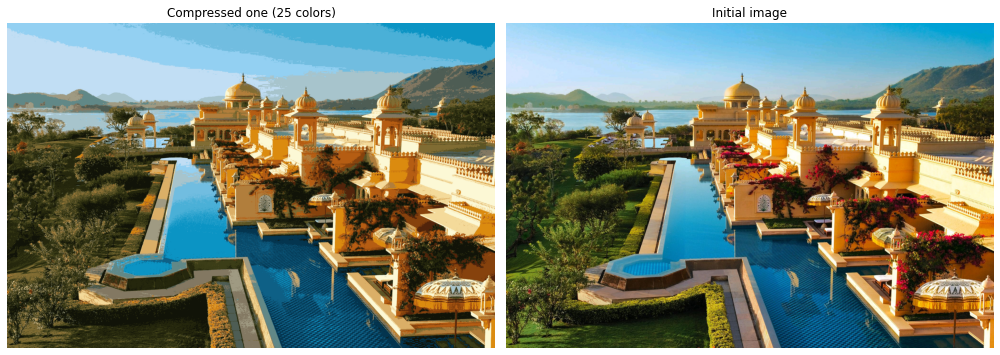

In [25]:
figre, axs = plt.subplots(1, 2, figsize = (14, 10))
axs[1].imshow(img)
axs[1].set_title('Initial image')
axs[0].imshow(X_cmpresd)
axs[0].set_title('Compressed one (25 colors)')
for axs in figre.axes:
    axs.axis('off')
plot.tight_layout();

## Mini batch k-means digit classification

In [16]:
!pip install keras

     |████████████████████████████████| 4.5 MB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/laptop-pr-13/Documents/Data Science/Layer/venv/bin/python3 -m pip install --upgrade pip' command.


In [18]:
!pip install tensorflow

     |████████████████████████████████| 454.4 MB 102 kB/s eta 0:00:01     |███████████████▊                | 222.5 MB 1.3 MB/s eta 0:03:01     |████████████████████▎           | 288.3 MB 1.4 MB/s eta 0:01:58     |█████████████████████████▎      | 358.9 MB 1.4 MB/s eta 0:01:09     |█████████████████████████▌      | 361.7 MB 1.4 MB/s eta 0:01:07
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
     |████████████████████████████████| 1.2 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 1.5 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
     |████████████████████████████████| 6.0 MB 1.

In [64]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
from keras.datasets import mnist

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
print('Train data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Train data: (60000, 28, 28)
Training Labels: (60000,)


In [68]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


<ipython-input-69-ce3df78404d6>:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figur.show()


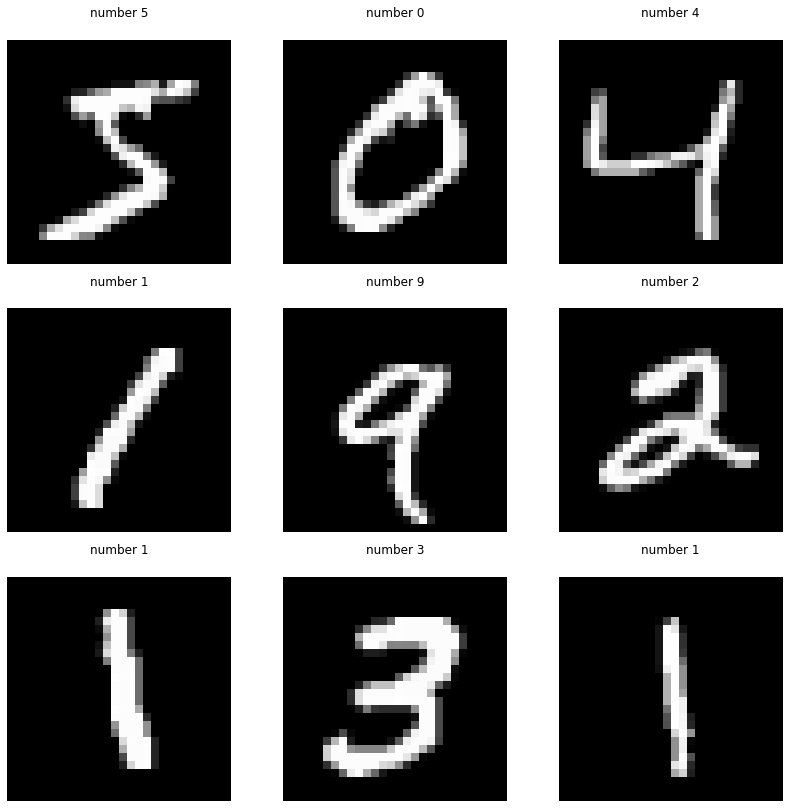

In [69]:
figur, axi = plt.subplots(3, 3, figsize=(14, 14))
plt.gray()

for j, axs in enumerate(axi.flat):
    axs.matshow(x_train[j])
    axs.axis('off')
    axs.set_title('number {}'.format(y_train[j]))
    
figur.show()

In [70]:
# Convert the image into 1dimensional array

X = x_train.reshape(len(x_train), -1)
Y = y_train

# normalize the data
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [71]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model

kmeans = MiniBatchKMeans(n_clusters=n_digits)

# Fit the model to training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [72]:
kmeans.labels_

array([3, 4, 0, ..., 8, 5, 3], dtype=int32)

In [73]:
def cluster_labels_infer(kmeans, actual_lbls):
    """
    returns: dictionary(clusters assigned to labels)
    """

    infrd_labels = {}

    for n in range(kmeans.n_clusters):

        labels = []
        index = np.where(kmeans.labels_ == n)

        labels.append(actual_lbls[index])

        # find common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        
        # assigning cluster to a val in dict
        if np.argmax(counts) in infrd_labels:
    
            infrd_labels[np.argmax(counts)].append(n)
        else:
            # create a new array
            infrd_labels[np.argmax(counts)] = [n]
        
    return infrd_labels

In [74]:
def data_labels_infer(X_labels, clstr_labels):
    """
    Depending on the cluster assignment find the label
    predicted labels are returned for each array
    """
    
    pred_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for l, clstr in enumerate(X_labels):
        for key, val in clstr_labels.items():
            if clstr in val:
                pred_labels[i] = key
                
    return pred_labels

In [75]:

clstr_labels = cluster_labels_infer(kmeans, Y)
input_clusters = kmeans.predict(X)
pred_labels = data_labels_infer(input_clusters, clstr_labels)
print(pred_labels[:18])
print(Y[:18])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8]


In [76]:

from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate  metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [58]:

clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = cluster_labels_infer(estimator, Y)
    predicted_Y = data_labels_infer(estimator.labels_, cluster_labels)
    
    # calculate accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2386305.7776956474
Homogeneity: 0.4417321253219202
Accuracy: 0.09873333333333334

Number of Clusters: 16
Inertia: 2213470.838256916
Homogeneity: 0.5478758115074964
Accuracy: 0.09871666666666666

Number of Clusters: 36
Inertia: 1962414.2304059458
Homogeneity: 0.6649755522505492
Accuracy: 0.09871666666666666

Number of Clusters: 64
Inertia: 1819579.3265349867
Homogeneity: 0.7468713990528928
Accuracy: 0.09871666666666666

Number of Clusters: 144
Inertia: 1631063.8327960628
Homogeneity: 0.8074137401057168
Accuracy: 0.09871666666666666

Number of Clusters: 256
Inertia: 1513671.9768264885
Homogeneity: 0.839728324281987
Accuracy: 0.09871666666666666



In [77]:

# testing
# convert each image to 1 D array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# fit KMeans algorithm 
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = cluster_labels_infer(kmeans, Y)

# predict
test_clusters = kmeans.predict(X_test)
predicted_labels = data_labels_infer(kmeans.predict(X_test), cluster_labels)
    
# calculate accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.098



<ipython-input-79-f112e99e4d4f>:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


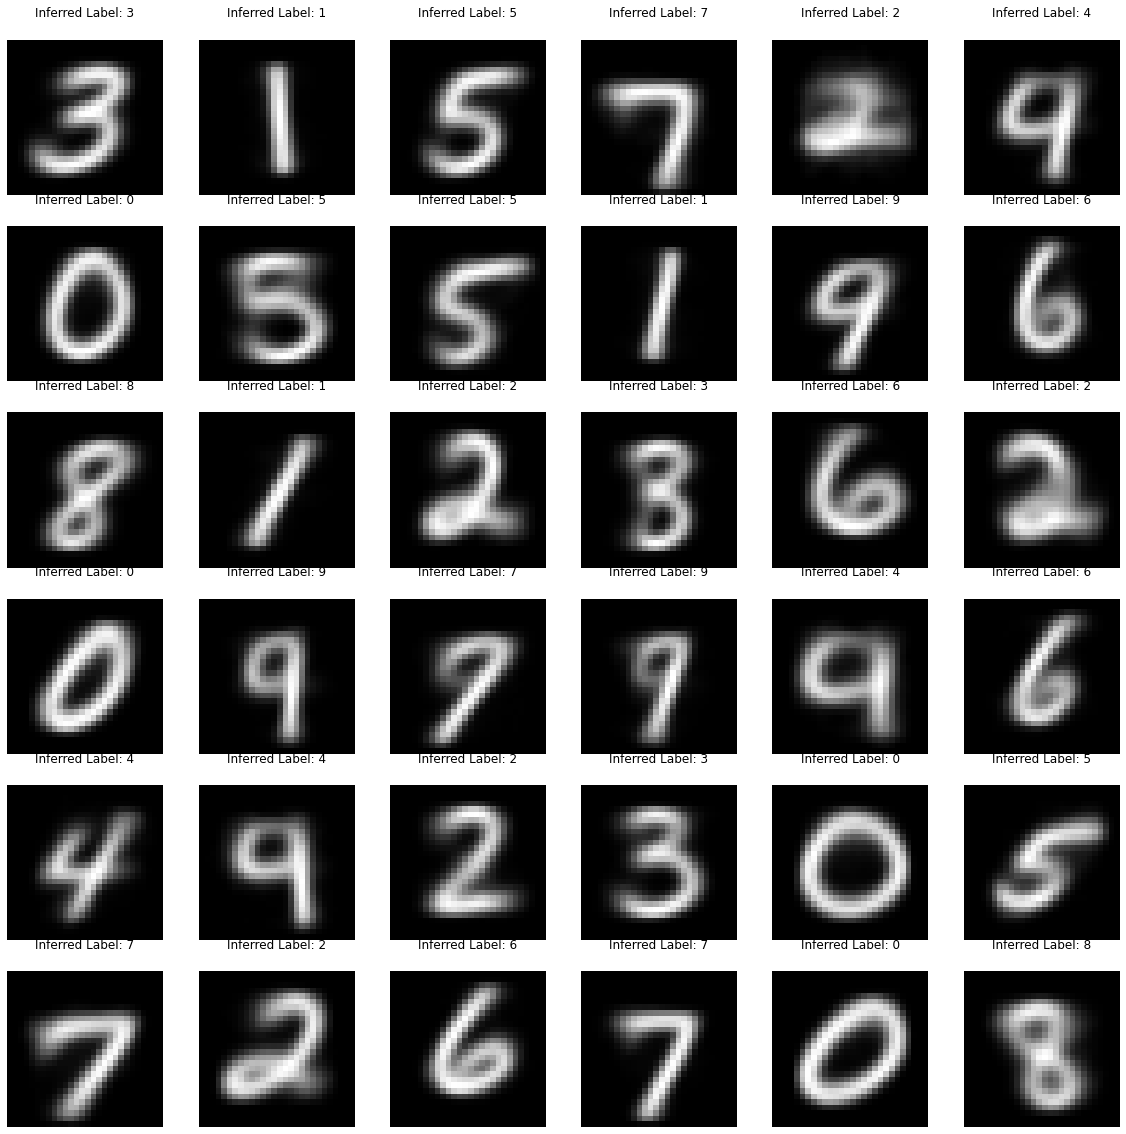

In [79]:

#fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = cluster_labels_infer(kmeans, Y)

# subplots 
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

[Refernce](https://github.com/xoraus/K-Means-Clustering-for-Imagery-Analysis/blob/master/KMeans%20Clustering%20for%20Imagery%20Analysis%20(Jupyter%20Notebook).ipynb)